In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
path = r'C:\Users\joelf\OneDrive\Documents\NPSAnalysis'

In [23]:
#looking at NPs and NMs as it is more typical for them to have campsites
df = pd.read_csv(os.path.join(path, 'Parks and Location.csv'))
df = df.loc[(df['ParkType'] == 'National Park') | (df['ParkType'] == 'National Monument')]

In [24]:
df_k = df[['RecreationVisits','RecreationHours','TentCampers','RVCampers','BackcountryCampers','Campers']]

In [25]:
df_k.head()

,RecreationVisits,RecreationHours,TentCampers,RVCampers,BackcountryCampers,Campers
516,6011,37446,102,13,0,115
517,5243,17661,53,8,0,61
518,11165,36051,176,37,0,213
519,219351,1334058,1037,459,0,1496
520,339416,2088588,3193,1148,0,4341


In [26]:
clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in clusters]
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))]

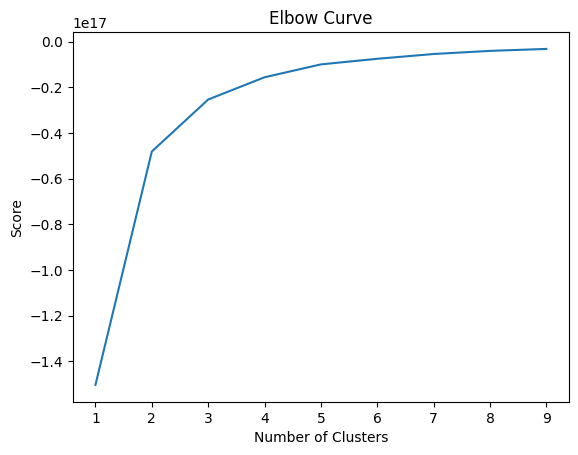

In [27]:
pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a larger jump between 1 and 2 and then it begins to level out. I plan to look at both 3 and 4 clusters and see which is best.

In [28]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_k)
df_k['Clusters'] = kmeans.fit_predict(df_k)
df_k['Clusters'].value_counts()

C:\Users\joelf\AppData\Local\Temp\ipykernel_24064\2514420814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['Clusters'] = kmeans.fit_predict(df_k)


0    61161
1     2417
2      556
Name: Clusters, dtype: int64

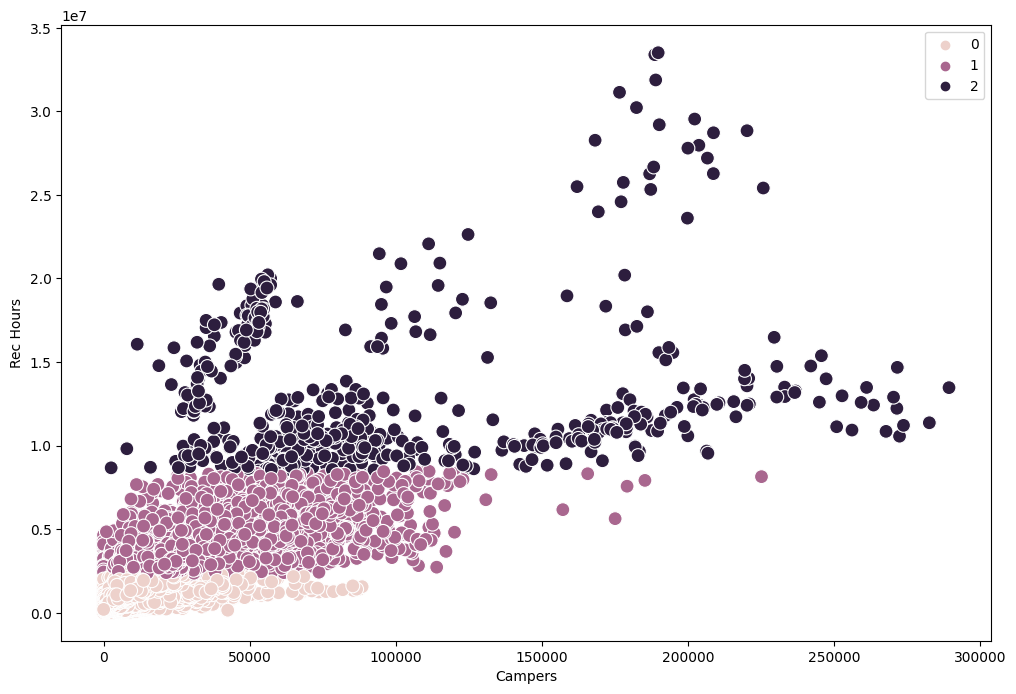

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Campers'], y=df['RecreationHours'], hue=kmeans.labels_, s=100) 
plt.xlabel('Campers') # Label x-axis.
plt.ylabel('Rec Hours') # Label y-axis.
plt.show()

After running 3 and 4 clusters I chose 3 clusters as the best fit for this model

Creating graphs with different variables to see what works best

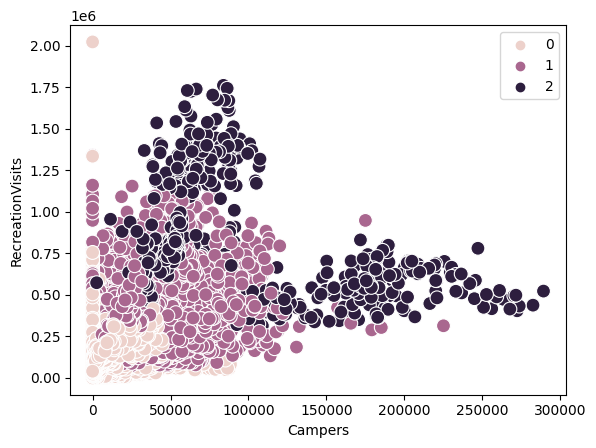

In [30]:
ax = sns.scatterplot(x=df['Campers'], y=df['RecreationVisits'], hue=kmeans.labels_, s=100) 
plt.xlabel('Campers') # Label x-axis.
plt.ylabel('RecreationVisits') # Label y-axis.
plt.show()

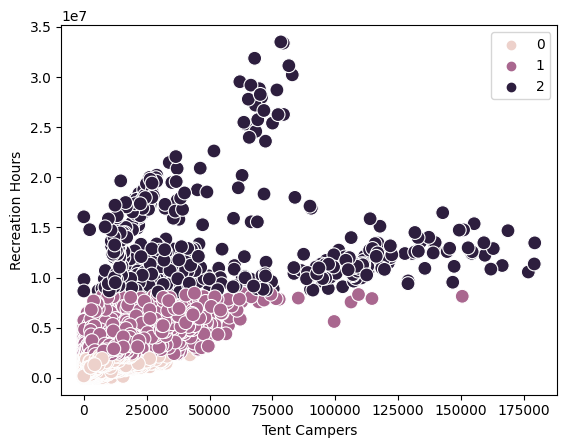

In [31]:
ax = sns.scatterplot(x=df['TentCampers'], y=df['RecreationHours'], hue=kmeans.labels_, s=100) 
plt.xlabel('Tent Campers') # Label x-axis.
plt.ylabel('Recreation Hours') # Label y-axis.
plt.show()

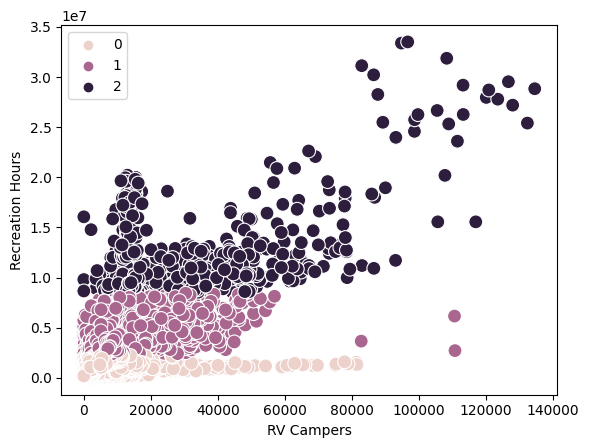

In [32]:
ax = sns.scatterplot(x=df['RVCampers'], y=df['RecreationHours'], hue=kmeans.labels_, s=100) 
plt.xlabel('RV Campers') # Label x-axis.
plt.ylabel('Recreation Hours') # Label y-axis.
plt.show()

The first graph with clusters on RecreationHours and Campers (total of RV, Tent, Backcountry) has the best defined layers of clusters

In [33]:
df_k.loc[df_k['Clusters'] == 0 , 'Cluster Color'] = 'peach'
df_k.loc[df_k['Clusters'] == 1 , 'Cluster Color'] = 'purple'
df_k.loc[df_k['Clusters'] == 2 , 'Cluster Color'] = 'black'


C:\Users\joelf\AppData\Local\Temp\ipykernel_24064\326394183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k.loc[df_k['Clusters'] == 0 , 'Cluster Color'] = 'peach'


In [34]:
df_k.groupby('Clusters').agg({'RecreationHours':['mean', 'median'], 'Campers':['mean', 'median'],
    'TentCampers':['mean', 'median'],'RVCampers':['mean', 'median'] })

RecreationHours                    Campers            TentCampers  \
                    mean      median           mean   median          mean   
Clusters                                                                     
0           1.762899e+05     36121.0    1713.910793      7.0    752.540328   
1           4.458647e+06   4136733.0   39013.871742  34335.0  18295.727762   
2           1.251969e+07  10945716.0  101064.296763  78742.0  50013.158273   

                      RVCampers           
           median          mean   median  
Clusters                                  
0             0.0    629.713527      0.0  
1         15735.0  11721.750517   9186.0  
2         35018.0  33639.965827  26050.5

In [35]:
df_k.to_csv(os.path.join(path, 'Parks and Location Clusters.csv'), index = False)

These results can be used in the future to better predict recreation hours based on number of campers or what characteristics of the parks draw more/less campers.
1. Cluster group 0 having such a low median across the variables, and the number of rows that are part of the 0 cluster, shows the high number of parks that have 0 campers. Further analysis into region or park size might show why parks in this group may have a smaller number of campers.
2. Cluster group 1 shows can be analyzed as high trafficed parks. These places have a nonzero number of campers and a high number of recreation hours. The location and type of park can be analyzed to see what similarities exists that draw people to spend time in these parks.
3. Cluster group 2 shows the small number of parks that tend to have a either a high ratio or hours to campers or a high ratio of hours to campers. Parks in this cluster can be analyzed to see if/why these patterns form. This might be due to the parks in remote locations like or areas known for backpacking.
